> FEATURE ENGINEERING

    
    step-1. Feature Transformation
        - Missing Value Imputation
        - Handling Categorical Value
        - Outliers Detection
        - Feature Scalling
        
    step-2. Feature Construction

    step-3. Feature Selection

    step-4. Feature Extraction
        - PCA
        - LDA
        - TSNA

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#TRAIN, TEST & SPLIT
from sklearn.model_selection import train_test_split

# StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Algo
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#Accuracy score
from sklearn.metrics import accuracy_score

> FEATURE SCALLING.

- Standardize the independent feature present in the data in fixed range.
- Basic main 2 types of Feature scalling.
    1. Standardization
    2. Normalization
        - Min-Max Scaler
        - Robust Scaler

> Standadization

- also called **Z Score Normalization.**
- transform dataset formula is 

    **Xi - µ / σ**
- after conversion of all data points its data points  

    **µ** = 0, **σ** = 1
    
    - **Where to USE?**
    
        - K-MEANS Algorithm (Eucledian distance measure)
        - K-NEAREST-NEIGHBOURS (distance between pairs of samples)
        - Principle Component Analysis (feature with maximum varience)
        - Artificial Neural Network (Apply in Gradient Descent)
        - Gradient Descent (Theta calculation become faster after feature scalling and learning rate in update equation)

    - **Not In USE..!**

        - Decision Tree algorithm
        - Random Forest algorithm
        - Gradient boost algo
        - XG Boost algo

> NORMALIZATION

- applied to part of data prepare for the machine learning. use to change a numeric column in dataset into a common scale without disturbing its nature.
    1. MinMaxScaler
        - (Xi - X_min) / (X_max - X_min)
        - datasets known min and max value is bounded. (image datasets 0-255)
        
    2. Mean Normalization
        - (Xi - µ) / (Xmax - Xmin)
        - mean centered data.
        - not support in scikit learn.
        - use in centered data.

    3. Max Absolute Scalling
        - Xi / (|Xmax|)
        - support scikit learn (MaxAbsScaler)
        - use case in sparse data -> where data have much number of zeros('0')
    4. Robust Scalling.
        - (Xi - Xmedian) / IQR
        - support sklearn (RobustScaler)
        - robust to outliers.

> DIFF BETWEEN STANDARDIZATION v/s NORMALIZATION

-  most problem using Standardization.

In [2]:
ads = pd.read_csv('data/Feature_scalling/Social_Network_Ads.csv', usecols=['Age', 'EstimatedSalary', 'Purchased'])
ads.sample(5)

,Age,EstimatedSalary,Purchased
36,33,28000,0
52,29,83000,0
18,46,28000,1
235,46,79000,1
149,20,74000,0


In [3]:
# TRAIN, TEST, SPLIT
x_train, x_test, y_train, y_test = train_test_split(ads.drop('Purchased', axis=1), ads.Purchased, test_size=0.3, random_state=0)
print(x_train.shape)
print(x_test.shape)

(280, 2)
(120, 2)


In [4]:
# STANDARD SCALER
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

x_train_scaled.sample(5)

,Age,EstimatedSalary
269,1.091743,0.526120
201,0.307425,0.063415
186,-0.869053,0.381525
51,-0.084734,0.005577
197,-0.869053,-0.254694


In [5]:
age_mean, salary_mean = scaler.mean_[0], scaler.mean_[1]
print(f'Age mean: {age_mean} \nSalary mean: {salary_mean}')

Age mean: 37.166666666666664 
Salary mean: 69591.66666666667


In [6]:
np.round(x_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [7]:
np.round(x_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


Text(0.5, 1.0, 'After Scalling')

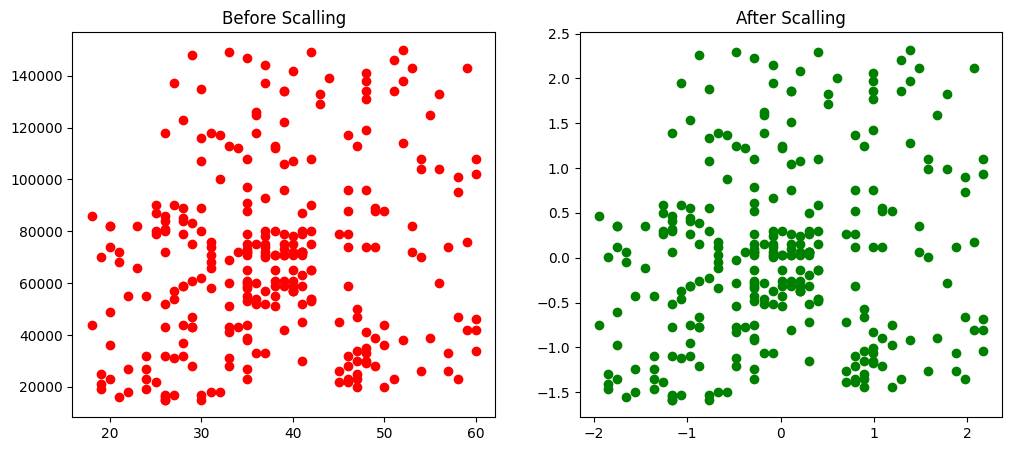

In [8]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'], color='red')
ax1.set_title("Before Scalling")
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'], color='green')
ax2.set_title("After Scalling")

<AxesSubplot:title={'center':'Age distribution After Scalling'}, xlabel='Age', ylabel='Density'>

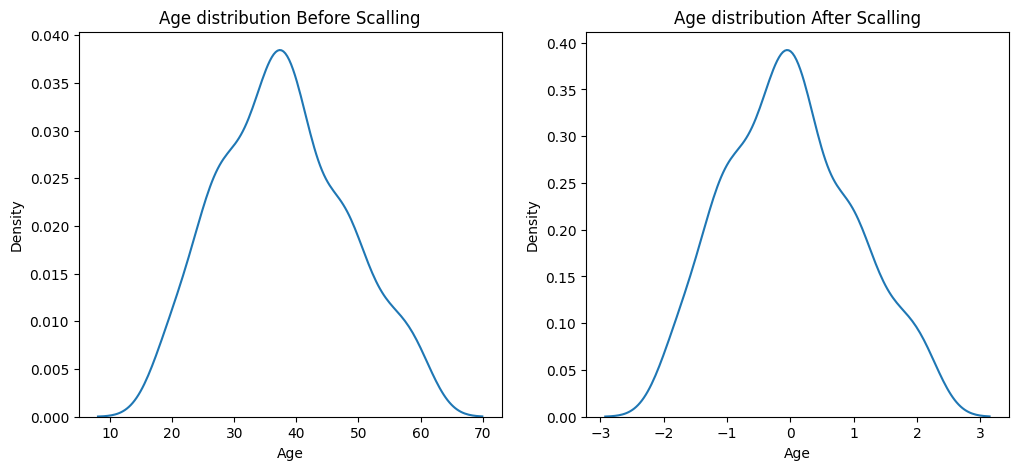

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title("Age distribution Before Scalling")
sns.kdeplot(x_train['Age'], ax=ax1)

ax2.set_title("Age distribution After Scalling")
sns.kdeplot(x_train_scaled['Age'], ax=ax2)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

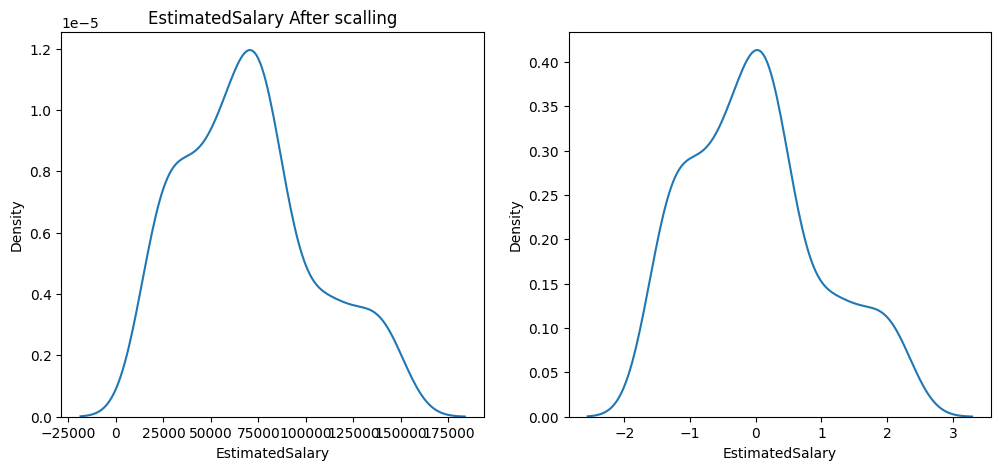

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title('EstimatedSalary Before scalling')
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

ax1.set_title('EstimatedSalary After scalling')
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)

In [11]:
# Algo
lr = LogisticRegression()
lr_scaled = LogisticRegression()

lr.fit(x_train, y_train)
lr_scaled.fit(x_train_scaled, y_train)

y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)


print("Logistic Regression accuracy score: ")
print("Actual score: ", accuracy_score(y_test, y_pred))
print("Scaled score: ", accuracy_score(y_test, y_pred_scaled))

Logistic Regression accuracy score: 
Actual score:  0.6583333333333333
Scaled score:  0.8916666666666667


In [12]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

dt.fit(x_train, y_train)
dt_scaled.fit(x_train_scaled, y_train)

y_pred = dt.predict(x_test)
y_pred_scaled = dt_scaled.predict(x_test_scaled)

print("Decision Tree classifier accuracy score: ")
print("Actual: ", accuracy_score(y_test, y_pred))
print("Scaled: ", accuracy_score(y_test, y_pred_scaled))

Decision Tree classifier accuracy score: 
Actual:  0.875
Scaled:  0.8666666666666667


In [13]:
# Effect of Outliers
ads = ads.append(pd.DataFrame({'Age':[5,90,95], 'EstimatedSalary':[1000,250000,350000], 'Purchased':[0,1,1]}), ignore_index=True)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(ads.drop('Purchased', axis=1), ads.Purchased, test_size=0.3, random_state=0)

scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

Text(0.5, 1.0, 'After Scalling')

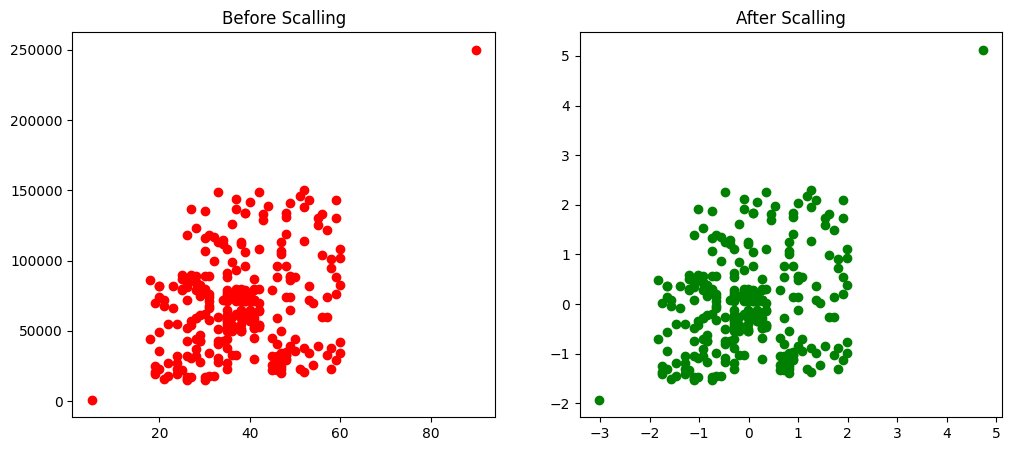

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'], color='red')
ax1.set_title("Before Scalling")
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'], color='green')
ax2.set_title("After Scalling")

$$ NORMALIZATION $$

In [19]:
wine = pd.read_csv('data/Feature_scalling/wine_data.csv', header=None, usecols=[0,1,2])
wine.columns = ['Class_label', 'Alcohol', 'Malic_acid']
wine.sample(5)

,Class_label,Alcohol,Malic_acid
129,2,12.04,4.30
45,1,14.21,4.04
82,2,12.08,1.13
23,1,12.85,1.60
53,1,13.77,1.90


<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

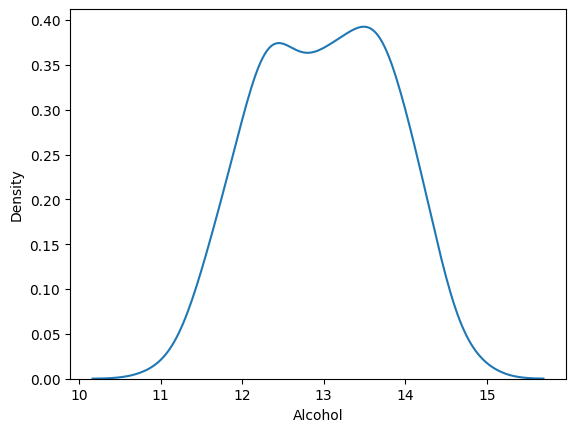

In [20]:
sns.kdeplot(wine['Alcohol'])

e:\programming data\data_science\DL\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Alcohol', ylabel='Malic_acid'>

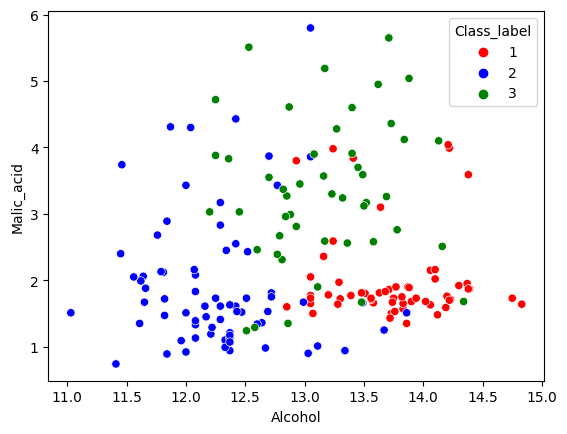

In [21]:
color_dict = {1:'red', 2:'blue', 3:'green'}
sns.scatterplot(wine['Alcohol'], wine['Malic_acid'], hue=wine['Class_label'], palette=color_dict)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(wine.drop('Class_label', axis=1),
                                                    wine.Class_label,
                                                    test_size=0.3,
                                                    random_state=0)
x_train.shape, x_test.shape

((124, 2), (54, 2))

In [26]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [27]:
np.round(x_train.describe(), 1)

,Alcohol,Malic_acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [28]:
np.round(x_train_scaled.describe(), 1)

,Alcohol,Malic_acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


- squish original datasets into 0 to 1 range.

Text(0.5, 1.0, 'After scaling')

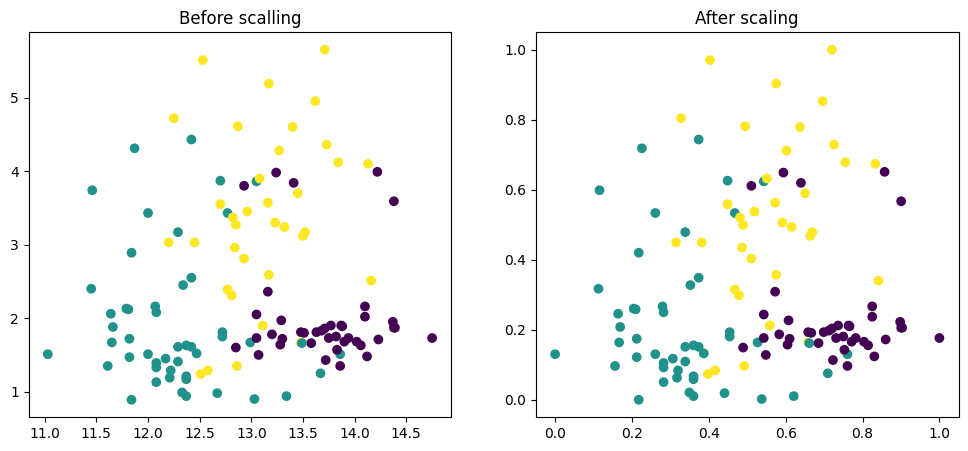

In [29]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(x_train['Alcohol'], x_train['Malic_acid'], c=y_train)
ax1.set_title("Before scalling")
ax2.scatter(x_train_scaled['Alcohol'], x_train_scaled['Malic_acid'], c=y_train)
ax2.set_title("After scaling")

<AxesSubplot:title={'center':'After'}, xlabel='Alcohol', ylabel='Density'>

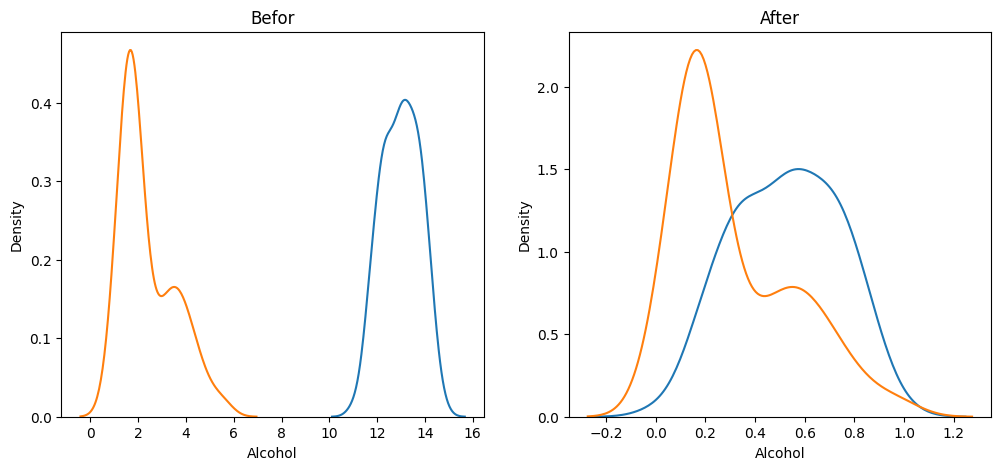

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Befor")
sns.kdeplot(x_train['Alcohol'], ax=ax1)
sns.kdeplot(x_train['Malic_acid'], ax=ax1)

ax2.set_title("After")
sns.kdeplot(x_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(x_train_scaled['Malic_acid'], ax=ax2)